In [2]:
%load_ext autoreload
%autoreload 2

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import pandas

from collections import defaultdict, Counter

# Exercise 2

<img src="img/Exercise02.png" width=600>


### Data points

In [119]:
x = np.array([
      2, 3, 4, 13, 18
])

### Get likelihood and unnormed posterior 

$$p(\lambda| \vec x, I) = \frac{ p(\vec x | \lambda, I) \cdot p(\lambda | I) }{ p(\vec x)} $$

We know the it is an exponential decay, therefore the likelihood must be
$$p(x |\lambda ) \propto \mathrm{e}^{- \lambda x} $$

Normalization, given the observation window yields
$$p(x | \lambda) = \frac{\mathrm{e}^{- \lambda x}}{-1/\lambda \cdot (\mathrm{e}^{- \lambda \cdot 20} - \mathrm{e}^{  \lambda \cdot 1})} $$

For lambda we don't know anything: 
$$p(\lambda) = const. $$



In [174]:
def posterior(l, x):
    
    def helper(x, l):
        prior_l = 1/l
        prior_x = np.exp(-1/-l) - np.exp(-20/l)
        likelihood = np.exp(-x/l)
        return likelihood * prior_l / prior_x
        
    return np.array([np.prod(helper(x, ll)) for ll in l])

In [175]:
posterior([0.4], x=x)

array([1.35385087e-47])

### We want to work in the range [0.1, 100].
Lets calculate the normalisation

In [176]:

l = np.linspace(0.1, 100, 100)

Z = np.sum(posterior(l, x=x))
Z

2.5025089954433386e-05

## Plot the normalized posterior 

Text(0, 0.5, 'posterior: $p(\\lambda|x)$')

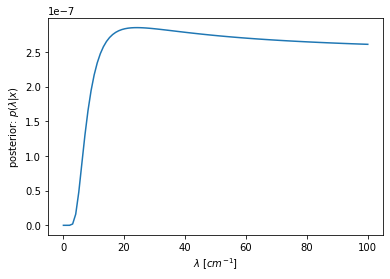

In [178]:

plt.plot(l, (posterior(l, x=x)))
plt.xlabel("$\lambda$ [$cm^{-1}$]")
plt.ylabel("posterior: $p(\lambda|x)$")

### Expectation value 

In [180]:
l[np.argmax(posterior(l=l, x=x))]

24.31818181818182